![0.jfif](https://uupload.ir/files/cy6_air.png)

# Practice 5

<div dir="auto">
  دیتاست Cats vs Dogs از دیتاست های معروف سایت Kaggle هستش
  لینکشم اینجاس اگه خواستید یه نگاهی بندازید!
  
  https://www.kaggle.com/c/dogs-vs-cats

<div dir="auto">
قراره که امروز این دیتاست رو بررسی کنیم و یه شبکه برای کلسیفای کردن تصاویر سگ و گربه طراحی کنیم

<div dir="auto">
اول از همه باید کتابخونه های مورد نیاز ایمپورت بشن

In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copy, move
from glob import glob as g
from tqdm.notebook import tqdm

<div dir="auto">
بعدش باید داده های مورد نیاز از لین خودشون دانلود بشن
دستور wget 
برای دانلود کردن فایل استفاده میشه و دستور unzip 
اکسترکت کردن های فایل زیپ استفاده میشه

In [2]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/content/cats-and-dogs.zip"

!unzip -xq '/content/cats-and-dogs.zip' #Linux Command

count = 0
for name in tqdm(g('/content/PetImages/*/*')):
  
  if not os.path.getsize(name):
    count += 1
    os.remove(name)
print(count, ' empty files removed')

--2022-02-14 18:48:28--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.73.0.105, 2600:1409:9800:686::e59, 2600:1409:9800:693::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.73.0.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/content/cats-and-dogs.zip’

/content/cats-and-d 100%[===================>] 786.68M   153MB/s    in 5.2s    

2022-02-14 18:48:33 (152 MB/s) - ‘/content/cats-and-dogs.zip’ saved [824894548/824894548]



  0%|          | 0/25002 [00:00<?, ?it/s]

2  empty files removed


<div dir="auto">
اگه تو قسمت سمت چپ نوت بوکتون، دکمه ای که آیکون فایل داره رو کلید کنید، به فایل هایی که در حافظه ی کولب براتون ذخیره شده دسترسی پیدا می کنید

<div dir="auto">
پوشه ی PetImages رو نگاه کنید
داخلش دو تا پوشه ی سگ و گربه وجود داره

<div dir="auto">
کتابخونه ی os
برای دسترسی به فایل ها و کار کردن با اون ها استفاده میشه.
شما میتونید با استفاده از دستور os.listdir(path_adress)
اسامی فایل های موجودر در path_adress رو مشاهده کنید

<div dir="auto">
برای مثال، اینجا تعدادی از اسامی فایل های موجود در پوشه ی Cat رو مشاهده می کنید.
همچنین تعدادشون هم پرینت میکنیم.

In [3]:
names = os.listdir('/content/PetImages/Cat')
print(len(names))
print(names[:5])

12500
['10511.jpg', '2846.jpg', '2345.jpg', '11807.jpg', '5656.jpg']


<div dir="auto">
همین کار رو برای پوشه Dog انجام بدید

In [4]:
names = os.listdir('/content/PetImages/Dog')
print(len(names))
print(names[:5])

12500
['10511.jpg', '2846.jpg', '2345.jpg', '11807.jpg', '5656.jpg']


<div dir="auto">
بالاتر تابع glob ایمپورت شده است
بیاید ببینیم کاری که این تابع می کنه چیه!
البته، برای راحتی کار، اسم این تابع فقط g گذاشته است یعنی گفتیم

from glob import glob as g

In [5]:
g('/content/PetImages/Cat/*jpg')

['/content/PetImages/Cat/10511.jpg',
 '/content/PetImages/Cat/2846.jpg',
 '/content/PetImages/Cat/2345.jpg',
 '/content/PetImages/Cat/11807.jpg',
 '/content/PetImages/Cat/5656.jpg',
 '/content/PetImages/Cat/5611.jpg',
 '/content/PetImages/Cat/11580.jpg',
 '/content/PetImages/Cat/1594.jpg',
 '/content/PetImages/Cat/286.jpg',
 '/content/PetImages/Cat/10711.jpg',
 '/content/PetImages/Cat/5189.jpg',
 '/content/PetImages/Cat/7825.jpg',
 '/content/PetImages/Cat/12313.jpg',
 '/content/PetImages/Cat/7237.jpg',
 '/content/PetImages/Cat/2977.jpg',
 '/content/PetImages/Cat/10549.jpg',
 '/content/PetImages/Cat/11123.jpg',
 '/content/PetImages/Cat/5647.jpg',
 '/content/PetImages/Cat/2534.jpg',
 '/content/PetImages/Cat/7602.jpg',
 '/content/PetImages/Cat/174.jpg',
 '/content/PetImages/Cat/11379.jpg',
 '/content/PetImages/Cat/1009.jpg',
 '/content/PetImages/Cat/4446.jpg',
 '/content/PetImages/Cat/11247.jpg',
 '/content/PetImages/Cat/10588.jpg',
 '/content/PetImages/Cat/9977.jpg',
 '/content/PetImages

<div dir="auto">
همون طور که بالا مشاهده می کنید، تمامی فایل هایی که در پوشه Cat وجود دارند و 
دارای پسوند jpg هستند رو به شما خروجی میده
و همچین آدرس کامشون رو به شما میده!

پس تفاوتش با os.listdir چیه؟؟؟
به جای ... بنویسید

os.listdir نام های عکس ها را در یک لیست خروجی می دهد
glob  آدرس عکس ها را (به همراه نام آن ها) در یک لیست خروجی می دهد

<div dir="auto">
همون طور که میدونید، ما هم به دیتای ترین نیاز داریم هم دیتای تست. ولی تو این دیتاست این دیتاها رو برامون جدا نکردن و مسئولیتش با خودمونه!
پس باید چیکار کنیم؟
باید خودموت داده های ترین و تست رو جدا کنیم

<div dir="auto">
توی پوشه ی اصلی کولب که توش پوشه های PetImages و sample_data وجود داره میخوایم یه پوشه به اسم 
cats-v-dogs
بسازیم، همچنین داخل پوشه، میخوایم دو تا پوشه ی دیگه به نام های training و testing بسازیم و توی هر کدومشون  
دو تا پوشه ی دیگه به نام های cats و dogs بسازیم

<div dir="auto">
آدرس هایی که توی لیست to_create هستند رو میخوایم ایجاد کنیم.
با یه حلقه ی for 
و استفاده از دستور 

os.makedirs(directory, exist_ok = True)

این پوشه ها رو ایجاد کنید

In [6]:
train_cats_dir = '/content/cats-v-dogs/training/cats'
train_dogs_dir = '/content/cats-v-dogs/training/dogs'
test_cats_dir = '/content/cats-v-dogs/testing/cats'
test_dogs_dir = '/content/cats-v-dogs/testing/dogs'
to_create = [
            train_cats_dir,
            train_dogs_dir,
            test_cats_dir,
            test_dogs_dir
]
for x in to_create:
  os.makedirs(x, exist_ok = True)

<div dir="auto">
حالا که پوشه های مورد نیاز ایجاد شدند که البته خالی هستند میخوایم داده های ترین و تست رو جدا کنیم.



<div dir="auto">
همون طور که میدونید! باید از تابع 
train_test_split 
استفاده کنید.
میخوایم 10 درصد داده ها بعنوان تست استفاده بشن و همچنین برای این که نتایجتون با بقیه مشابه باشه حتما حتما 
random_state
رو برابر 101 قرار بدید

اگه با این تابع آشنا نیستید از لینک زیر استفاده کنید.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

<div dir="auto">
ابتدا آدرس کامل تمامی تصاویر سگ و گربه رو با استفاده از تابع g  به دست بیارید.

In [7]:
all_cats = sorted(g('/content/PetImages/Cat/*jpg'))
all_dogs = sorted(g('/content/PetImages/Dog/*jpg'))

<div dir="auto">
بعدش از دستور train_test_split با پارامترهای داده شده استفاده کنید که تصاویر گربه ها رو به ترین و تست تبدیل کنید

In [8]:
from sklearn.model_selection import train_test_split
dogs_train, dogs_test = train_test_split(all_dogs, test_size = 0.1, random_state = 101, shuffle = True)

<div dir="auto">
همین کار رو برای تصاویر گربه ها انجام بدید

In [9]:
cats_train, cats_test = train_test_split(all_cats, test_size = 0.1, random_state = 101, shuffle = True)

<div dir="auto">
حالا باید فایل هایی که در هر کدوم از چهار لیست

cats_train, cats_test, dogs_test, dogs_train

هستش رو به پوشه های مرتبط با خودشون انتقال بدیم

In [10]:
for name in tqdm(dogs_train):
  copy(name , os.path.join(train_dogs_dir , name.split('/')[-1]))
for name in tqdm(cats_train):
  copy(name , os.path.join(train_cats_dir , name.split('/')[-1]))
  
for name in tqdm(dogs_test):
  copy(name , os.path.join(test_dogs_dir , name.split('/')[-1]))
for name in tqdm(cats_test):
  copy(name , os.path.join(test_cats_dir , name.split('/')[-1]))

  0%|          | 0/11249 [00:00<?, ?it/s]

  0%|          | 0/11249 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

<div dir="auto">
کد بالا رو تحلیل کنید برای خودتون! 
چون خیلی مهمه 


<div dir="auto">
اگه کارای بالا رو درست انجام داده باشید، با دستور زیر تعداد فایل های هر پوشه رو میتونید ببنینید

In [11]:
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(test_cats_dir)))
print(len(os.listdir(test_dogs_dir)))

# expected output
# 11250
# 11250
# 1250
# 1250

11249
11249
1250
1250


<div dir="auto">
حالا بايد يه ديتا جنريتور بسازيد که داده هاتون رو rescale بکنه

همين کار رو براي داده ها
و بعدشم يه ترين جنريتور بسازيد که که متوجه بشه قالب داده هاتون binary هستش
 
همین کار رو برای داده های تست هم انجام بدید

In [14]:
TRAINING_DIR = '/content/cats-v-dogs/training'
train_datagen = ImageDataGenerator(rescale=1 / 255)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=64,
    class_mode='binary',
    target_size=(150, 150)
)

VALIDATION_DIR = '/content/cats-v-dogs/testing'
validation_datagen  = ImageDataGenerator(rescale = 1/255)
validation_generator =  validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size = 64,
    class_mode = 'binary',
    target_size = (150,150)
)

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


<div dir="auto">
حالا شبکه تون رو بسازید!
این سری دیگه هیچ توضیحاتی در مورد نحوه ی ساخت شبکه داده نمیشه.

صفر تا صدش با خودتون =)

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))



<div dir="auto">
بعد بایستی مدلتون رو کامپایل کنید

In [44]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])


<div dir="auto">
با دستور زیر، مدلتون رو آموزش بدید

تفاوت این ترین کردن با نحوه ی قبلی چیه؟

...

In [45]:
print('Num Params : ',model.count_params())
history = model.fit(
    train_generator,
    epochs=30,
    verbose=1,
    validation_data=validation_generator
)

Num Params :  10926113
Epoch 1/30
108/352 [========>.....................] - ETA: 46s - loss: 0.7355 - accuracy: 0.5219

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

352/352 [==============================] - 76s 216ms/step - loss: 0.6438 - accuracy: 0.6239 - val_loss: 0.5664 - val_accuracy: 0.7048
Epoch 2/30
352/352 [==============================] - 74s 211ms/step - loss: 0.5048 - accuracy: 0.7523 - val_loss: 0.5183 - val_accuracy: 0.7500
Epoch 3/30
352/352 [==============================] - 74s 210ms/step - loss: 0.3923 - accuracy: 0.8216 - val_loss: 0.4727 - val_accuracy: 0.7632
Epoch 4/30
352/352 [==============================] - 74s 210ms/step - loss: 0.2667 - accuracy: 0.8883 - val_loss: 0.5575 - val_accuracy: 0.7548
Epoch 5/30
352/352 [==============================] - 74s 210ms/step - loss: 0.1423 - accuracy: 0.9452 - val_loss: 0.6871 - val_accuracy: 0.7600
Epoch 6/30
352/352 [==============================] - 75s 214ms/step - loss: 0.0741 - accuracy: 0.9731 - val_loss: 0.8452 - val_accuracy: 0.7448
Epoch 7/30
352/352 [==============================] - 75s 212ms/step - loss: 0.0513 - accuracy: 0.9835 - val_loss: 1.0559 - val_accuracy: 0.7


<div dir="auto">
 با ران کردن کد زیر نتایج
   loss و accuracy تون رو پلات کنید

Text(0.5, 1.0, 'Training and validation loss')

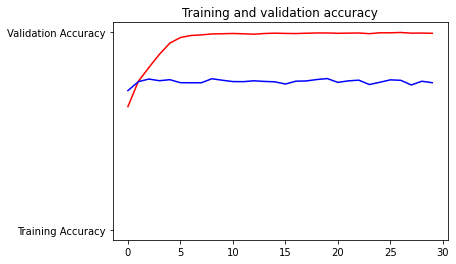

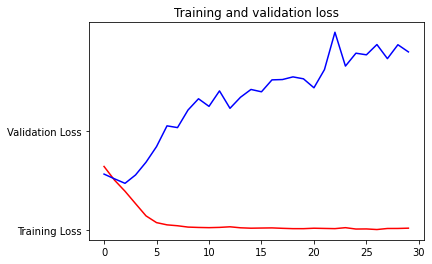

In [48]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)


<div dir="auto">
استفاده از داده های خودتون!

با ران کردن کد زیر، تصاویری که خودتون از اینترنت دانلود کردید رو آپلود کنید و نتایج رو مشاهده کنید

In [60]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.
    classes = model.predict(x, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a Dog")
    else:
        print(fn + " is a Cat")

Saving cat.jpg to cat.jpg
[0.00048985]
cat.jpg is a Cat
